In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import auc

In [86]:
df = pd.read_csv('/Users/noahpovis/Desktop/Buildweek22/Build Week 2 /DX.csv')
df.shape

(27131, 18)

In [83]:
df.head()

,Transaction Name,Transaction Name URL,Organization Name,Organization Name URL,Funding Type,Money Raised,Money Raised Currency,Money Raised Currency (in USD),Announced Date,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Organization Description,Organization Industries,Organization Location,Lead Investors,Number of Investors,Investor Names
0,"Series A - Protecht, Inc",https://www.crunchbase.com/funding_round/protecht-inc-series-a--47e3f861,"Protecht, Inc",https://www.crunchbase.com/organization/protecht-inc,Series A,5000000,USD,5000000,2019-08-10,21925000,USD,21925000,"Protecht, previously known as ‘TicketGuardian’, is the leader insurtech startup partner to venues to insure their experiences for fans","FinTech, Fraud Detection, Insurance, InsurTech, Payments","Newport Beach, California, United States, North America",American Family Ventures,1,American Family Ventures
1,Series A - Radius Networks,https://www.crunchbase.com/funding_round/radius-networks-series-a--7654e848,Radius Networks,https://www.crunchbase.com/organization/radius-networks,Series A,15000000,USD,15000000,2019-08-11,25435000,USD,25435000,Radius Networks is the leading provider of mobile proximity technologies used by app developers .,"Hardware, Information Technology, Software","Washington, District of Columbia, United States, North America","Contour Venture Partners, Core Capital Partners, Pendrell Corporation",3,"Contour Venture Partners, Core Capital Partners, Pendrell Corporation"
2,Series A - Light Field Lab,https://www.crunchbase.com/funding_round/light-field-lab-inc-series-a--7fedbcdd,Light Field Lab,https://www.crunchbase.com/organization/light-field-lab-inc,Series A,28000000,USD,28000000,2019-08-12,35000000,USD,35000000,Light Field Lab is a breakthrough technology startup that builds an innovative holographic ecosystem.,"Digital Entertainment, Film, Hardware, Industrial Design, Information Technology, Media and Entertainment, Software","San Jose, California, United States, North America","Robert Bosch Venture Capital, Taiwania Capital",12,"ACME Capital, Alumni Ventures Group, Comcast Ventures, Hella Ventures, Khosla Ventures, Liberty Global Ventures, NTT DOCOMO Ventures, R7 Partners, Robert Bosch Venture Capital, Samsung Ventures, Taiwania Capital, Verizon Ventures"
3,Series A - Polarity,https://www.crunchbase.com/funding_round/breach-intelligence-inc-series-a--b1dbeb9c,Polarity,https://www.crunchbase.com/organization/breach-intelligence-inc,Series A,8100000,USD,8100000,2019-08-12,11600000,USD,11600000,Polarity by Breach Intelligence Enables Real-time Collaboration for IT and Security Professionals,"Business Information Systems, Collaboration, Computer, Security, Software","Farmington, Connecticut, United States, North America",TechOperators,5,"Gula Tech Adventures, Kaiser Permanente, Shasta Ventures, Strategic Cyber Ventures, TechOperators"
4,Series A - FISPAN,https://www.crunchbase.com/funding_round/fi-span-services-inc-series-a--b71745a1,FISPAN,https://www.crunchbase.com/organization/fi-span-services-inc,Series A,8500000,USD,8500000,2019-08-12,12500000,USD,12500000,Fintech Service Management for Financial Institutions,"Banking, Financial Services, FinTech, Information Technology","Vancouver, British Columbia, Canada, North America",FINTOP Capital,4,"Business Development Bank of Canada, FINTOP Capital, Panache Ventures, Rhino Ventures (Formerly Vancouver Founder Fund)"


In [24]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 
    return i 

In [25]:
df_clean = clean(df)

In [26]:
def split_columns(text):
    text = text.copy()
    # new data frame with split value columns 
    new = text["Organization Industries"].str.split(",", n = 7, expand = True) 
    # making separate first name column from new data frame 
    text["Primary Industry"]= new[0] 
    # making separate last name column from new data frame 
    text["Sub_Ind"]= new[1] 
    text["Sub_Ind2"]= new[2]
    text["Sub_Ind3"]= new[3]
    text["Sub_Ind4"]= new[4]
    text["Sub_Ind5"]= new[5]
    text["Sub_Ind6"]= new[6]
    text["Sub_Ind7"]= new[7]
    # Dropping old Name columns 
    text.drop(columns =["Organization Industries"], inplace = True)

    #same thing but for investor column 
    new1 = text["Investor Names"].str.split(",", n = 11, expand = True) 
    # making separate first name column from new data frame 
    text["Investor1"]= new1[0] 
    # making separate last name column from new data frame 
    text["Investor1"]= new1[1] 
    text["Investor2"]= new1[2]
    text["Investor3"]= new1[3]
    text["Investor4"]= new1[4]
    text["Investor5"]= new1[5]
    text["Investor6"]= new1[6]
    text["Investor7"]= new1[7]
    text["Investor8"]= new1[8]
    text["Investor9"]= new1[9]
    text["Investor10"]= new1[10]
    text["Investor11"]= new1[11]
    # Dropping old Name columns 
    text.drop(columns =["Investor Names"], inplace = True)
    text.drop(columns =["Lead Investors"], inplace = True)
    text.drop(columns =["Number of Investors"], inplace = True)
    text.drop(columns =["Transaction Name"], inplace = True)
    text.drop(columns =["Transaction Name URL"], inplace = True)
    text.drop(columns =["Organization Name URL"], inplace = True)
    text.drop(columns =["Funding Type"], inplace = True)
    text.drop(columns =["Money Raised Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount"], inplace = True)
    text.drop(columns =["Money Raised"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
    text.drop(columns =['Announced Date'], inplace = True) 
    text = text[text['Money Raised Currency (in USD)'].notna()]
    text = text[text['Organization Location'].notna()]
    text = text[text['Primary Industry'].notna()]
    text = text[text['Money Raised Currency (in USD)'].notna()]

    



    return text 
    


In [27]:
df_split = split_columns(df_clean)

In [28]:
def clean_null(a):
    a['Primary Industry'].fillna('Not Listed', inplace = True)
    a['Sub_Ind'].fillna('Not Listed', inplace = True)
    a['Sub_Ind2'].fillna('Not Listed', inplace = True)
    a['Sub_Ind3'].fillna('Not Listed', inplace = True)
    a['Sub_Ind4'].fillna('Not Listed', inplace = True)
    a['Sub_Ind5'].fillna('Not Listed', inplace = True)
    a['Sub_Ind6'].fillna('Not Listed', inplace = True)
    a['Sub_Ind7'].fillna('Not Listed', inplace = True)
    a['Investor1'].fillna('Not Listed', inplace = True)
    a['Investor2'].fillna('Not Listed', inplace = True)
    a['Investor3'].fillna('Not Listed', inplace = True)
    a['Investor4'].fillna('Not Listed', inplace = True)
    a['Investor5'].fillna('Not Listed', inplace = True)
    a['Investor6'].fillna('Not Listed', inplace = True)
    a['Investor7'].fillna('Not Listed', inplace = True)
    a['Investor8'].fillna('Not Listed', inplace = True)
    a['Investor9'].fillna('Not Listed', inplace = True)
    a['Investor10'].fillna('Not Listed', inplace = True)
    a['Investor11'].fillna('Not Listed', inplace = True)
    
    return a 





In [29]:
data = clean_null(df_split)
data.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
9439,Fastcast,229230.0,Fastcast is the global data driven talent supp...,"San Jose, California, United States, North Ame...",0,Advertising,Enterprise Software,Human Resources,Music,Video,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
8787,JARVISH,2225000.0,"JARVISH company of intelligent helmet systems,...","Taipei, T'ai-pei, Taiwan, Asia",0,Augmented Reality,Internet of Things,Wearables,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
22914,Easy Storage,659987.0,Easy Storage offers storage space to e-commerce.,"Yeoksamdong, Seoul-t'ukpyolsi, South Korea, Asia",0,E-Commerce,Logistics,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
8803,Woof Concept,209930.0,"Woof Concept Products offers stylish, durable ...","Richmond, British Columbia, Canada, North America",0,Fashion,Not Listed,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
5426,hoopo,3500000.0,"hoopo enables geolocation for low-power, wide-...","Ra'anana, HaMerkaz, Israel, Asia",0,Information Technology,Telecommunications,Not Listed,Not Listed,Not Listed,...,Japan-Israel Hi-Tech Ventures,TAU Ventures,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [30]:
data.isnull().sum()

Organization Name                 0
Money Raised Currency (in USD)    0
Organization Description          0
Organization Location             0
Raised Series A                   0
Primary Industry                  0
Sub_Ind                           0
Sub_Ind2                          0
Sub_Ind3                          0
Sub_Ind4                          0
Sub_Ind5                          0
Sub_Ind6                          0
Sub_Ind7                          0
Investor1                         0
Investor2                         0
Investor3                         0
Investor4                         0
Investor5                         0
Investor6                         0
Investor7                         0
Investor8                         0
Investor9                         0
Investor10                        0
Investor11                        0
dtype: int64

In [31]:
#convert all to categories 
data["Organization Name"] = data["Organization Name"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Location"] = data["Organization Location"].astype('category')
data["Primary Industry"] = data["Primary Industry"].astype('category')
data["Sub_Ind"] = data["Sub_Ind"].astype('category')
data["Sub_Ind2"] = data["Sub_Ind2"].astype('category')
data["Sub_Ind3"] = data["Sub_Ind3"].astype('category')
data["Sub_Ind4"] = data["Sub_Ind4"].astype('category')
data["Sub_Ind5"] = data["Sub_Ind5"].astype('category')
data["Sub_Ind6"] = data["Sub_Ind6"].astype('category')
data["Sub_Ind7"] = data["Sub_Ind7"].astype('category')
data["Investor1"] = data["Investor1"].astype('category')
data["Investor2"] = data["Investor2"].astype('category')
data["Investor3"] = data["Investor3"].astype('category')
data["Investor4"] = data["Investor4"].astype('category')
data["Investor5"] = data["Investor5"].astype('category')
data["Investor6"] = data["Investor6"].astype('category')
data["Investor7"] = data["Investor7"].astype('category')
data["Investor8"] = data["Investor8"].astype('category')
data["Investor9"] = data["Investor9"].astype('category')
data["Investor10"] = data["Investor10"].astype('category')
data["Investor11"] = data["Investor11"].astype('category')


In [32]:
data.dtypes

Organization Name                 category
Money Raised Currency (in USD)     float64
Organization Description          category
Organization Location             category
Raised Series A                      int64
Primary Industry                  category
Sub_Ind                           category
Sub_Ind2                          category
Sub_Ind3                          category
Sub_Ind4                          category
Sub_Ind5                          category
Sub_Ind6                          category
Sub_Ind7                          category
Investor1                         category
Investor2                         category
Investor3                         category
Investor4                         category
Investor5                         category
Investor6                         category
Investor7                         category
Investor8                         category
Investor9                         category
Investor10                        category
Investor11 

In [90]:
view = pd.Series(data.columns)
view

0     Organization Name             
1     Money Raised Currency (in USD)
2     Organization Description      
3     Organization Location         
4     Raised Series A               
5     Primary Industry              
6     Sub_Ind                       
7     Sub_Ind2                      
8     Sub_Ind3                      
9     Sub_Ind4                      
10    Sub_Ind5                      
11    Sub_Ind6                      
12    Sub_Ind7                      
13    Investor1                     
14    Investor2                     
15    Investor3                     
16    Investor4                     
17    Investor5                     
18    Investor6                     
19    Investor7                     
20    Investor8                     
21    Investor9                     
22    Investor10                    
23    Investor11                    
dtype: object

In [34]:
raised = data[data['Raised Series A'] == 1] 

In [35]:
raised.sample(5)

,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
14693,Altitude Networks,2000000.0,Protects enterprises using cloud collaboration...,"San Francisco, California, United States, Nort...",1,Internet,Security,Software,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
23838,Park+,1200000.0,Park+ is an interactive parking application.,"Delhi, Delhi, India, Asia",1,Apps,Parking,Not Listed,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
14725,Preply,4000000.0,Preply is a fast growing product company at an...,"Kyiv, Kyyiv, Ukraine, Europe",1,E-Commerce,EdTech,Education,Human Resources,Internet,...,Point Nine Capital,Przemyslaw Gacek,RTAventures VC,SMRK VC Fund,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
6669,Anchore,3000000.0,Anchore helps organizations implement secure c...,"Santa Barbara, California, United States, Nort...",1,Cloud Security,Computer,Enterprise Software,Information Technology,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
17780,Stori Card,1500000.0,Stori Card provides inclusive financial servic...,"Washington, District of Columbia, United State...",1,Banking,Credit Cards,Financial Services,FinTech,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [36]:
#the baseline 
data['Raised Series A'].value_counts(normalize=True)

0    0.942486
1    0.057514
Name: Raised Series A, dtype: float64

In [37]:
#also baseline
((0.942486*0.942486)+(0.057514*0.057514))*100

89.15877203920002

In [38]:
x = data.drop(columns=['Raised Series A'])
y = data['Raised Series A']

In [39]:
#CatBoosting 
from sklearn.model_selection import train_test_split
X_trainc, X_testc, y_trainc, y_testc = train_test_split(x, y, train_size=0.7, random_state=1234)

In [40]:
#categorical features 
categorical_features_indices = np.where(x.dtypes != np.float)[0]
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1)
model.fit(X_trainc, y_trainc,cat_features=categorical_features_indices,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5781357	total: 23.5ms	remaining: 1.15s
1:	learn: 0.4905975	total: 37.2ms	remaining: 894ms
2:	learn: 0.4252704	total: 41.5ms	remaining: 650ms
3:	learn: 0.3668758	total: 67.3ms	remaining: 774ms
4:	learn: 0.3310237	total: 73.8ms	remaining: 664ms
5:	learn: 0.2985655	total: 81.7ms	remaining: 599ms
6:	learn: 0.2741553	total: 87.1ms	remaining: 535ms
7:	learn: 0.2597342	total: 96ms	remaining: 504ms
8:	learn: 0.2485459	total: 102ms	remaining: 464ms
9:	learn: 0.2380100	total: 108ms	remaining: 431ms
10:	learn: 0.2315613	total: 114ms	remaining: 405ms
11:	learn: 0.2254359	total: 120ms	remaining: 380ms
12:	learn: 0.2209957	total: 126ms	remaining: 359ms
13:	learn: 0.2162532	total: 133ms	remaining: 343ms
14:	learn: 0.2134406	total: 142ms	remaining: 331ms
15:	learn: 0.2107301	total: 150ms	remaining: 319ms
16:	learn: 0.2091387	total: 156ms	remaining: 304ms
17:	learn: 0.2059771	total: 164ms	remaining: 292ms
18:	learn: 0.2044907	total: 169ms	remaining: 275ms
19:	learn: 0.2031667	total: 175ms	r

In [41]:
#cat test predictions 
catpredictions_test = model.predict(X_testc)
print(classification_report(y_testc, catpredictions_test))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      3560
           1       0.00      0.00      0.00       227

    accuracy                           0.94      3787
   macro avg       0.47      0.50      0.48      3787
weighted avg       0.88      0.94      0.91      3787



In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [43]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((10098, 23), (2525, 23), (10098,), (2525,))

In [44]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


pipe = search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


In [45]:
print('Best hyperparameters', pipe.best_params_)
print('Cross-validation score', pipe.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 1.0, 'xgbclassifier__scale_pos_weight': 1000, 'xgbclassifier__reg_lambda': 1.5, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__gamma': 1.5, 'xgbclassifier__colsample_bytree': 1.0}
Cross-validation score 0.9399886719726951


In [46]:
#gridcv xgb 
predictions_test = pipe.predict(X_test)
print(classification_report(y_test, predictions_test))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.17      0.01      0.02       153

    accuracy                           0.94      2525
   macro avg       0.55      0.50      0.50      2525
weighted avg       0.89      0.94      0.91      2525



In [47]:
probs = pipe.predict_proba(X_test)
probs = probs[:, 1]

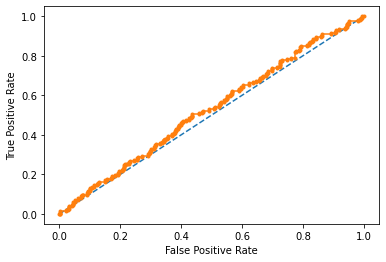

AUC: 0.528


In [48]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

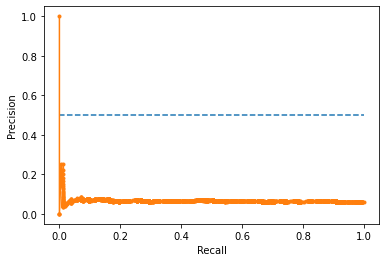

AUC: 0.066


In [50]:
#Precision-Recall Curve Line Plot for XGB GRIDCV for Imbalanced Classification
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

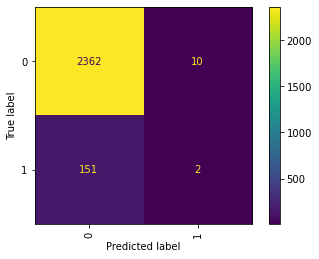

In [51]:
#XGB GRIDCV
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [52]:
document_lengths = np.array(list(map(len, data['Organization Description'].str.split(' '))))

print("The average number of words in a description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a description is: {}.".format(max(document_lengths)))

The average number of words in a description is: 13.168660381842669.
The minimum number of words in a description is: 1.
The maximum number of words in a description is: 28.


In [53]:
pd.set_option('display.max_colwidth', -1)

In [54]:
query = data.loc[data['Raised Series A'] == 0, 'Organization Description']
query.sample(5)

15284    Certified Ultra-Capacitor Electric Shared Mobility, Transport-as-a-Service, Connected IOT Vehicle System, Charging Infrastructure
3757     Mobile App for Patients and Doctors                                                                                              
5214     Owl is a data aggregator/analyzer that helps Financial Institutions know their customers like never before.                      
23019    Grand River Business Intelligence provides custom database-driven software to small and medium sized businesses.                 
13643    Sectech.io provides a credible and efficient electronic supply chain financial network.                                          
Name: Organization Description, dtype: category
Categories (12621, object): [A developing a comprehensive verification framework for Intelligent Autonomous Systems ., A fashion enterprise that provides a launchpad to fashion talent and brands using a tech enabled platform, A precise and portable in-vitro

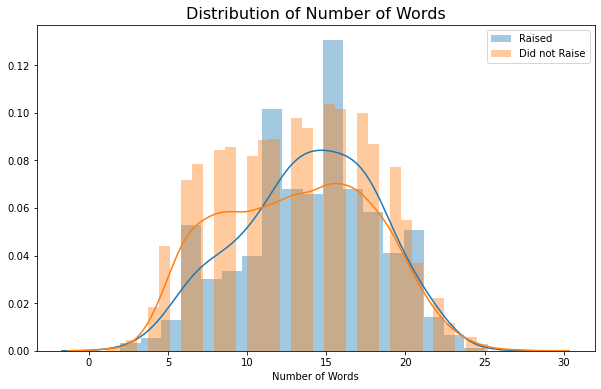

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax, label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

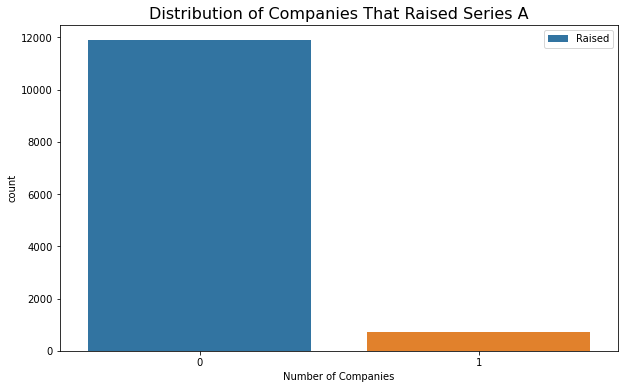

In [56]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='Raised Series A', data=data,ax=ax, label='Raised')
ax.set_title("Distribution of Companies That Raised Series A", fontsize=16)
ax.set_xlabel("Number of Companies")
plt.legend()
plt.show()

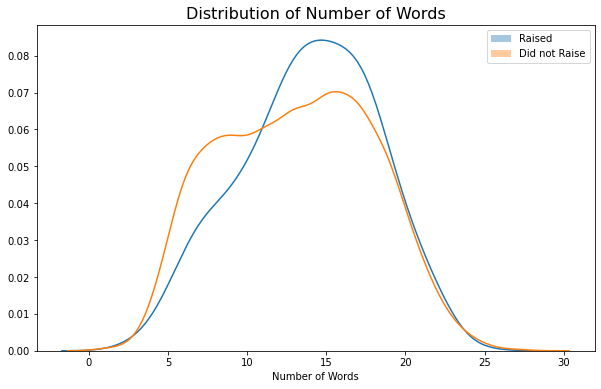

In [57]:
LogMin, LogMax = np.log10(data['Raised Series A'].min()),np.log10(data['Raised Series A'].max())
newBins = np.logspace(LogMin, LogMax,8)


fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax,bins=newBins,label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax,bins=newBins, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

In [58]:
# Function to preprocess raw test from job description
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
data['Organization Description'] = data['Organization Description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
data['Organization Description'] = data['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
data['Organization Description'] = data['Organization Description'].str.lower()

# Lemmatize
data['Organization Description'] = data['Organization Description'].map(lambda x: lemmatize(x))

In [59]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(data['Organization Description'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (12623, 14579)


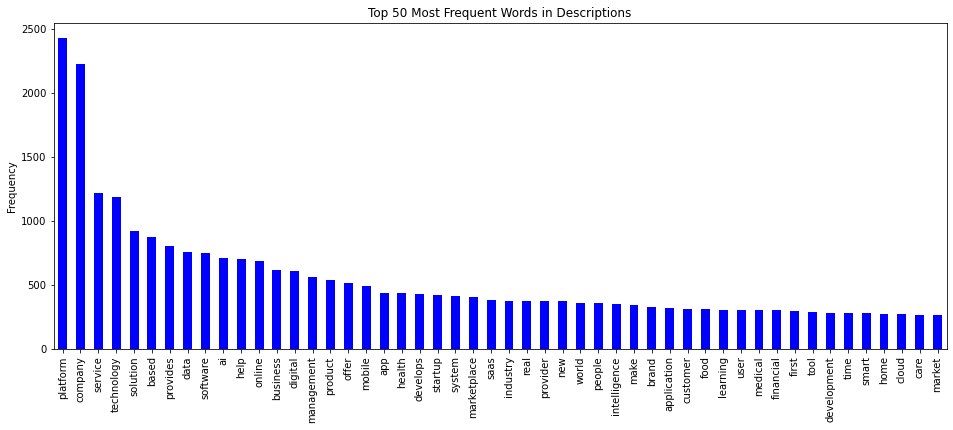

In [60]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Descriptions")
plt.ylabel("Frequency")
plt.show()

In [61]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=10)

In [62]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/noahpovis/.vscode/extensions/ms-python.python-2020.6.90262/pythonFiles/lib/python/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.025396 -0.140982  1       1        13.887478
7     -0.121966 -0.143456  2       1        11.164963
4     -0.074830  0.031323  3       1        11.130023
9     -0.051898  0.005779  4       1        10.042253
0      0.174643  0.022644  5       1        9.782093 
1      0.148898  0.043079  6       1        9.658377 
5      0.024095 -0.013572  7       1        9.267483 
3     -0.027982 -0.020652  8       1        9.176674 
2     -0.162291  0.158281  9       1        8.576756 
8      0.065935  0.057557  10      1        7.313899 , topic_info=             Term         Freq        Total Category  logprob  loglift
2500   company     2018.000000  2018.000000  Default  30.0000  30.0000
8421   mobile      442.000000   442.000000   Default  29.0000  29.0000
7463   learning    280.000000   280.000000   Default  28.0000  28.0000
6043   health      397.000000   397.000000   Default  27.0000  27.0000
286    ai          647.000000   647.000000   Default  26.0000  26.0000
...    ..                 ...          ...       ...      ...      ...
7906   management  35.810288    510.639105   Topic10 -5.6693  -0.0420 
3859   device      30.449936    214.652418   Topic10 -5.8315   0.6625 
12327  solution    34.267690    836.654883   Topic10 -5.7133  -0.5798 
1033   based       32.405334    797.974533   Topic10 -5.7692  -0.5884 
6160   help        30.424977    642.631322   Topic10 -5.8323  -0.4349 

[715 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
27     1      0.138748  access       
27     3      0.073025  access       
27     4      0.058420  access       
27     5      0.051118  access       
27     6      0.080328  access       
...   ..           ...     ...       
14504  6      0.163687  world        
14504  7      0.033344  world        
14504  8      0.118219  world        
14504  10     0.015156  world        
14520  5      0.928220  world largest

[1857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 10, 1, 2, 6, 4, 3, 9])

In [64]:

# xgbclassifer + topic modeling 
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)
topic_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([data, topic_df], axis=1)
print(f'Original Dataframe Shape: {data.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (12623, 24)
New Dataframe Shape: (12623, 34)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,Sub_Ind3,Sub_Ind4,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software designed to give investment management firm a strategic advantage in research,"New York, New York, United States, North America",0,Artificial Intelligence,Consulting,Content,Information Services,Information Technology,...,0.005556,0.005556,0.005557,0.005557,0.005556,0.005558,0.486122,0.005557,0.005556,0.469424
1,New Age Meats,2740000.0,new age meat focus on rapid development of healthy culitvated meat grown from animal cell instead of animal slaughter,"Berkeley, California, United States, North America",0,Biotechnology,Food and Beverage,Not Listed,Not Listed,Not Listed,...,0.006251,0.006251,0.006252,0.006252,0.006252,0.006251,0.006251,0.006252,0.663315,0.286673
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare company that offer medicare advantage health plan to it member,"Westminster, California, United States, North America",1,Health Care,Health Insurance,Insurance,Not Listed,Not Listed,...,0.005264,0.005264,0.005264,0.005264,0.952624,0.005264,0.005263,0.005264,0.005265,0.005265
3,Mahmee,3000000.0,mahmee provides comprehensive personalized support and care management pregnancy through infancy,"Los Angeles, California, United States, North America",0,Health Care,mHealth,Women's,Not Listed,Not Listed,...,0.009091,0.009091,0.009093,0.918169,0.009096,0.009091,0.009092,0.009092,0.009092,0.009092
4,The Org,2500000.0,the org is a community to explore organization chart for public and private company,"New York, New York, United States, North America",1,Communities,Information Technology,Internet,Not Listed,Not Listed,...,0.219624,0.009092,0.009093,0.707633,0.009093,0.009093,0.009093,0.009093,0.009092,0.009093


In [65]:
#for dash app 
df2.to_csv('df2.csv')

In [66]:
#make train test split 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
features = df2.loc[:, df2.columns != 'Raised Series A']
labels = df2['Raised Series A']

# Split data using 80% to train model and 20% to validate performance
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train2.shape))
print('Shape of Train Labels:   {}'.format(y_train2.shape))
print('Shape of Test Features:  {}'.format(X_test2.shape))
print('Shape of Test Labels:    {}'.format(y_test2.shape))

Shape of Train Features: (10098, 33)
Shape of Train Labels:   (10098,)
Shape of Test Features:  (2525, 33)
Shape of Test Labels:    (2525,)


In [67]:
#run xgboost with cv 
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, clone

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline2, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


pipe2 = search.fit(X_train2, y_train2);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


In [68]:
print('Best hyperparameters', pipe2.best_params_)
print('Cross-validation score', pipe2.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 1.0, 'xgbclassifier__scale_pos_weight': 100000, 'xgbclassifier__reg_lambda': 1.5, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 500, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__colsample_bytree': 0.6}
Cross-validation score 0.9430580769815465


In [69]:
predictions2 = pipe2.predict(X_test2)
print(classification_report(y_test2, predictions2))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.00      0.00      0.00       153

    accuracy                           0.94      2525
   macro avg       0.47      0.50      0.48      2525
weighted avg       0.88      0.94      0.91      2525



In [70]:
importance = pipe2.best_estimator_.named_steps["xgbclassifier"].feature_importances_
print(importance)

[0.02059746 0.05383774 0.02504488 0.03049796 0.0211452  0.02815092
 0.0198136  0.02827344 0.01699651 0.04367625 0.02754459 0.05439268
 0.02221237 0.01340694 0.02087586 0.01603279 0.01453777 0.00993137
 0.01598155 0.02400741 0.11431422 0.01685774 0.0139181  0.02114734
 0.03745608 0.04164872 0.03397823 0.04008668 0.04008965 0.04010433
 0.02930297 0.03886304 0.0252756 ]


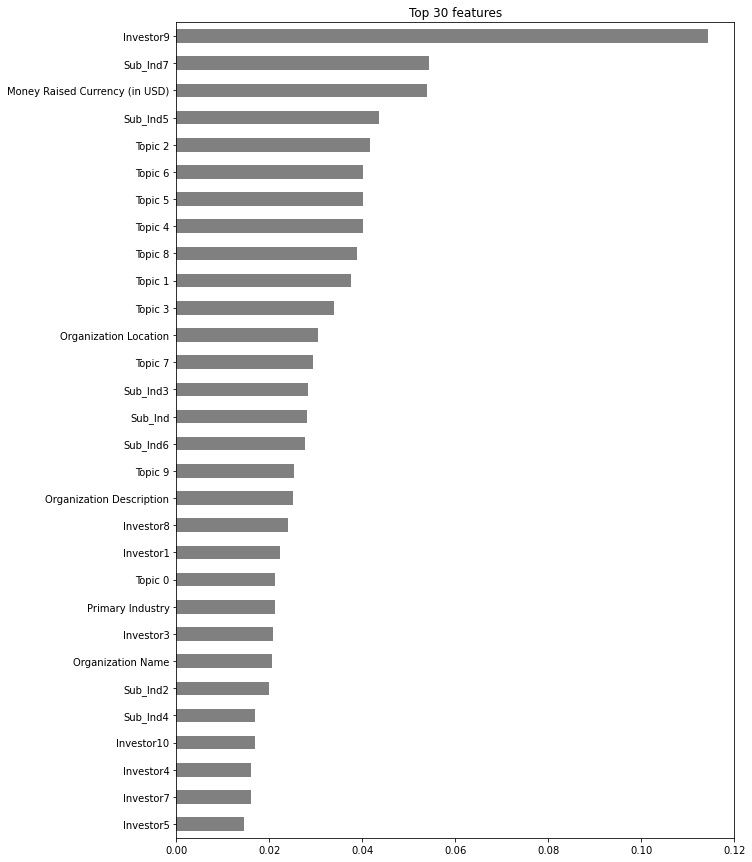

In [71]:
features = pd.Series(importance, X_train2.columns)
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
features.sort_values()[-n:].plot.barh(color='grey');


In [72]:
#without column 
pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search2 = RandomizedSearchCV(
    pipeline3, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)


column = ['Investor10','Sub_Ind5','Investor9','Sub_Ind7','Investor5','Investor8','Organization Description','Organization Name','Investor11','Sub_Ind6','Investor6']
pipe3 = search2.fit(X_train2.drop(columns=column), y_train2)
predictions3 = pipe3.predict(X_test2.drop(columns=column))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


In [73]:
print('Best hyperparameters', pipe3.best_params_)
print('Cross-validation score', pipe3.best_score_)

Best hyperparameters {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 3, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 10, 'xgbclassifier__max_depth': 4, 'xgbclassifier__gamma': 1, 'xgbclassifier__colsample_bytree': 0.8}
Cross-validation score 0.9258272647472772


In [74]:
#best score!!!!
print(classification_report(y_test2, predictions3))

precision    recall  f1-score   support

           0       0.94      0.98      0.96      2372
           1       0.24      0.10      0.15       153

    accuracy                           0.93      2525
   macro avg       0.59      0.54      0.55      2525
weighted avg       0.90      0.93      0.91      2525



In [75]:
# xgbclassifer + topic modeling 
probs2 = pipe3.predict_proba(X_test2.drop(columns=column))[:, -1]


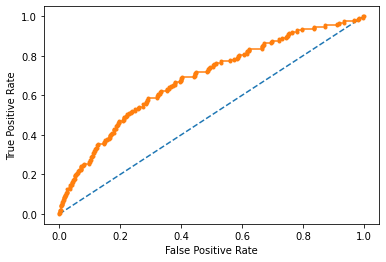

AUC: 0.528


In [76]:
#ROC Curve for xgbclassifer + topic modeling 
fpr, tpr, thresholds = roc_curve(y_test2, probs2)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [77]:
# xgbclassifer + topic modeling 
precision, recall, thresholds = precision_recall_curve(y_test2, probs2)
auc_score2 = auc(recall, precision)

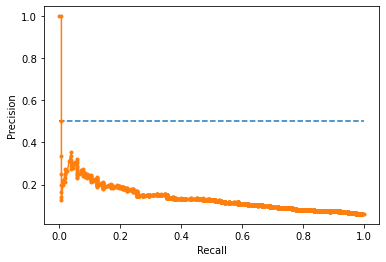

AUC: 0.528


In [78]:
#Precision-Recall Curve for xgbclassifer + topic modeling 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

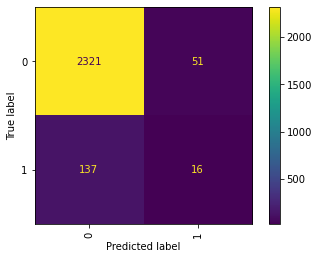

In [79]:
# xgbclassifer + topic modeling 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe3, X_test2.drop(columns=column), y_test2, values_format='.0f', xticks_rotation='vertical')

In [80]:
# i need to write a linear regression model log 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features2 = df2.loc[:, df2.columns != 'Raised Series A']
labels2 = df2['Raised Series A']


X_train3, X_test3, y_train3, y_test3 = train_test_split(features2, labels2, test_size = 0.2, random_state = 42)



In [157]:
#log 1 
pipeline3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe4 = pipeline3.fit(X_train3, y_train3);

In [173]:
#run test predictions for log 1 
predictions4 = pipe4.predict(X_test3)
print(classification_report(y_test3, predictions4))

precision    recall  f1-score   support

           0       0.94      0.98      0.96      2372
           1       0.12      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.53      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [174]:
#log 1 
probs0 = pipe4.predict_proba(X_test3)
probs0 = probs0[:, 1]

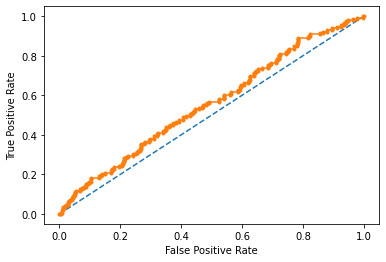

AUC: 0.558


In [175]:
#ROC Curve for log 1 
fpr, tpr, thresholds = roc_curve(y_test3, probs0)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test3, probs0)
print('AUC: %.3f' % auc_score)

In [176]:
#log 1 
precision, recall, thresholds = precision_recall_curve(y_test3, probs0)
auc_score2 = auc(recall, precision)

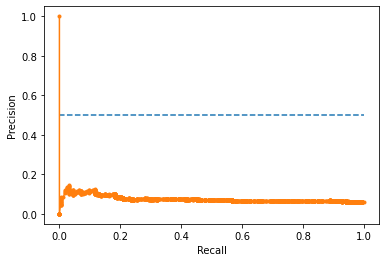

AUC: 0.558


In [177]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [178]:
# run logistic regression without the topic modeling 
features3 = data.loc[:, data.columns != 'Raised Series A']
labels3 = data['Raised Series A']


X_train4, X_test4, y_train4, y_test4 = train_test_split(features3, labels3, test_size = 0.2, random_state = 42)

In [180]:
#pipeline for log regression without topic modeling 
pipeline5 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    LogisticRegression()
)




pipe5 = pipeline5.fit(X_train4, y_train4);

In [181]:
#scores fore second log func
log_train2 = pipe5.predict(X_train4)
print("Log2 reg train Recall Accuracy:", recall_score(y_train4, log_train2))
print("Log2 reg train Accuracy Score:", accuracy_score(y_train4, log_train2))
print("Log2 reg train Precision Accuracy:", precision_score(y_train4, log_train2))

Log2 reg train Recall Accuracy: 0.0
Log2 reg train Accuracy Score: 0.9432560903149139
Log2 reg train Precision Accuracy: 0.0


In [182]:
#run test predictions 
predictions5 = pipe5.predict(X_test4)
print(classification_report(y_test4, predictions5))

precision    recall  f1-score   support

           0       0.94      0.99      0.96      2372
           1       0.16      0.03      0.05       153

    accuracy                           0.93      2525
   macro avg       0.55      0.51      0.51      2525
weighted avg       0.89      0.93      0.91      2525



In [184]:
probs5 = pipe5.predict_proba(X_test4)
probs5 = probs5[:, 1]

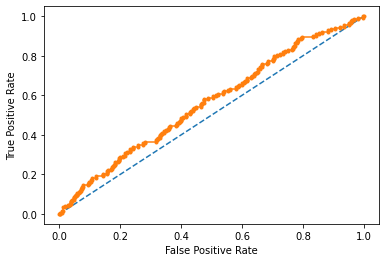

AUC: 0.564


In [186]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test4, probs5)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
auc_score = roc_auc_score(y_test4, probs5)
print('AUC: %.3f' % auc_score)

In [190]:
#log regression without topic modeling
precision, recall, thresholds = precision_recall_curve(y_test4, probs5)
auc_score2 = auc(recall, precision)

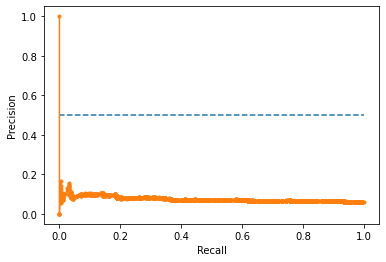

AUC: 0.564


In [191]:
#Precision-Recall Curve Line Plot for Log Model 1 for Imbalanced Classification 
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [81]:
#without column CatBoost 
pipelinec = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    CatBoostClassifier())




column = ['Investor10','Sub_Ind5','Investor9','Sub_Ind7','Investor5','Investor8','Organization Description','Organization Name','Investor11','Sub_Ind6','Investor6']
pipe3 = pipelinec.fit(X_train2.drop(columns=column), y_train2)
predictions3 = pipe3.predict(X_test2.drop(columns=column))

1293933	total: 10.5s	remaining: 6.63s
614:	learn: 0.1292780	total: 10.6s	remaining: 6.61s
615:	learn: 0.1291976	total: 10.6s	remaining: 6.59s
616:	learn: 0.1290835	total: 10.6s	remaining: 6.57s
617:	learn: 0.1289419	total: 10.6s	remaining: 6.55s
618:	learn: 0.1288573	total: 10.6s	remaining: 6.53s
619:	learn: 0.1287441	total: 10.6s	remaining: 6.51s
620:	learn: 0.1287129	total: 10.6s	remaining: 6.49s
621:	learn: 0.1285757	total: 10.7s	remaining: 6.47s
622:	learn: 0.1284751	total: 10.7s	remaining: 6.45s
623:	learn: 0.1284118	total: 10.7s	remaining: 6.43s
624:	learn: 0.1283692	total: 10.7s	remaining: 6.41s
625:	learn: 0.1282771	total: 10.7s	remaining: 6.39s
626:	learn: 0.1282138	total: 10.7s	remaining: 6.37s
627:	learn: 0.1281501	total: 10.7s	remaining: 6.35s
628:	learn: 0.1280130	total: 10.7s	remaining: 6.32s
629:	learn: 0.1279293	total: 10.7s	remaining: 6.3s
630:	learn: 0.1278582	total: 10.8s	remaining: 6.29s
631:	learn: 0.1277384	total: 10.8s	remaining: 6.28s
632:	learn: 0.1277031	total

In [82]:
#catboost
print(classification_report(y_test2, predictions3))

precision    recall  f1-score   support

           0       0.94      1.00      0.97      2372
           1       0.00      0.00      0.00       153

    accuracy                           0.94      2525
   macro avg       0.47      0.50      0.48      2525
weighted avg       0.88      0.94      0.91      2525

